In [1]:
## WeightWatcher helps you choose the best pretrained model for your needs.

## You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8

from scipy.ndimage.interpolation import zoom
import sys
sys.path.insert(0,'..')
from Classifier import VGG, ResNet
import numpy as np
import os
from utils import gradcamutils
from Classifier.DenseNet import densenet
from PIL import Image
import weightwatcher as ww
from Classifier.ResNet import *

Using TensorFlow backend.
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-pa

In [2]:
# use this environment flag to change which GPU to use 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # specify which GPU(s) to be used

vggModel = VGG.VGG19((224,224,3),4)
vggModel.summary()
vggModel.load_weights("VGG19_COVID19.h5") #load weights

#denseNetModel = densenet.DenseNetImageNet161(input_shape=(352,320,1),classes=4, weights=None)
#denseNetModel.summary()
#denseNetModel.load_weights("DenseNet161-COVID19.h5")

resNetModel = ResNet18((224, 224, 3), 4)#, False) 
resNetModel.summary()
resNetModel.load_weights("ResNet18_COVID19.h5")



Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0    

In [3]:
vggWatcher = ww.WeightWatcher(model=vggModel)
resultsVGG = vggWatcher.analyze(alphas=True)

vggWatcher.print_results()
vggWatcher.get_summary()

vggWatcherDetails = vggWatcher.get_details(results=resultsVGG)

2021-03-11 13:31:07,328 INFO 

python      version 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
numpy       version 1.18.1
tensforflow version 1.14.0
keras       version 2.3.1
2021-03-11 13:31:07,329 INFO Analyzing model 'vgg19' with 27 layers
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
2021-03-11 13:31:12,920 IN

In [4]:
vggWatcher.analyze(layers=ww.LAYER_TYPE.CONV2D)

for layer_id, result in resultsVGG.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))

2021-03-11 13:31:24,394 INFO Analyzing model 'vgg19' with 27 layers
2021-03-11 13:31:24,417 INFO ### Printing results ###
2021-03-11 13:31:27,551 INFO Check: min: 0.5196330149968466, max: 2.686712086200714, avg: 1.7726728388884112
2021-03-11 13:31:27,552 INFO Check compound: min: 0.9437395757066506, max: 2.0863910415271527, avg: 1.7382384685067627
2021-03-11 13:31:27,553 INFO CheckTF: min: False, max: True, avg: 0.0962962962962963
2021-03-11 13:31:27,553 INFO CheckTF compound: min: 0.0, max: 0.8333333333333334, avg: 0.12760416666666669


Layer 23, Slice 0: Lognorm: 1.3188821077346802
Layer 25, Slice 0: Lognorm: 1.050437092781067


In [5]:
resnetWatcher = ww.WeightWatcher(model=resNetModel)
resultsResNet = resnetWatcher.analyze(alphas=True)

resnetWatcher.print_results()
resnetWatcher.get_summary()

renetWatcherDetails = resnetWatcher.get_details(results=resultsResNet)

2021-03-11 13:31:27,602 INFO 

python      version 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
numpy       version 1.18.1
tensforflow version 1.14.0
keras       version 2.3.1
2021-03-11 13:31:27,603 INFO Analyzing model 'model_1' with 71 layers
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\en

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theore

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theore

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theore

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theore

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theore

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theore

2021-03-11 13:34:37,699 INFO Norm X compound: min: 7.704627990722656, max: 162.61654663085938, avg: 49.73987579345703
2021-03-11 13:34:37,700 INFO LogNorm X: min: 0.8711294531822205, max: 2.213870048522949, avg: 1.5107663869857788
2021-03-11 13:34:37,701 INFO LogNorm X compound: min: 0.8866746425628662, max: 2.2111620903015137, avg: 1.472642183303833
2021-03-11 13:34:37,702 INFO Alpha: min: 2.228849240846312, max: 32.65888740509297, avg: 7.291738203137602
2021-03-11 13:34:37,703 INFO Alpha compound: min: 2.500961504508224, max: 15.084676978206456, avg: 7.345452691688829
2021-03-11 13:34:37,703 INFO Alpha Weighted: min: 0.8841926712919744, max: 42.58947905705188, avg: 6.617825020180767
2021-03-11 13:34:37,704 INFO Alpha Weighted compound: min: 1.666237553570227, max: 12.78671032095422, avg: 6.3387095611385105
2021-03-11 13:34:37,704 INFO alpha pNorm: min: 1.8251288049448278, max: 42.90891156682913, avg: 7.397809088804095
2021-03-11 13:34:37,705 INFO alpha pNorm compound: min: 2.62612659

In [6]:
resnetWatcher.analyze(layers=ww.LAYER_TYPE.CONV2D)

for layer_id, result in resultsResNet.items():
    for slice_id, summary in result.items():
        if not str(slice_id).isdigit() or "lognorm" not in summary:
            continue
        lognorm = summary["lognorm"]
        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))

2021-03-11 13:34:37,752 INFO Analyzing model 'model_1' with 71 layers
2021-03-11 13:34:37,953 INFO ### Printing results ###
2021-03-11 13:34:43,731 INFO Check: min: 0.0832491822118547, max: 3.19476643618482, avg: 2.0665640238378047
2021-03-11 13:34:43,733 INFO Check compound: min: 0.0832491822118547, max: 3.1860676076311614, avg: 1.6733365732616823
2021-03-11 13:34:43,734 INFO CheckTF: min: False, max: True, avg: 0.22842639593908629
2021-03-11 13:34:43,735 INFO CheckTF compound: min: 0.0, max: 1.0, avg: 0.23809523809523808
2021-03-11 13:34:43,736 INFO Norm: min: 6.448193073272705, max: 51.11625671386719, avg: 22.24395179748535
2021-03-11 13:34:43,736 INFO Norm compound: min: 6.56549072265625, max: 50.97707748413086, avg: 20.718984603881836
2021-03-11 13:34:43,737 INFO LogNorm: min: 0.8094380497932434, max: 1.7085590362548828, avg: 1.234788417816162
2021-03-11 13:34:43,738 INFO LogNorm compound: min: 0.8172415494918823, max: 1.7073745727539062, avg: 1.2115806341171265
2021-03-11 13:34:4

Layer 5, Slice 0: Lognorm: 0.8756105899810791
Layer 5, Slice 1: Lognorm: 0.8878581523895264
Layer 5, Slice 2: Lognorm: 0.887606143951416
Layer 5, Slice 3: Lognorm: 0.883316159248352
Layer 5, Slice 4: Lognorm: 0.8843644261360168
Layer 5, Slice 5: Lognorm: 0.8919045329093933
Layer 5, Slice 6: Lognorm: 0.8808205127716064
Layer 5, Slice 7: Lognorm: 0.8833010196685791
Layer 5, Slice 8: Lognorm: 0.8905513882637024
Layer 7, Slice 0: Lognorm: 0.881505012512207
Layer 10, Slice 0: Lognorm: 0.8126397728919983
Layer 10, Slice 1: Lognorm: 0.8214560747146606
Layer 10, Slice 2: Lognorm: 0.8205751776695251
Layer 10, Slice 3: Lognorm: 0.8169407248497009
Layer 10, Slice 4: Lognorm: 0.8318116664886475
Layer 10, Slice 5: Lognorm: 0.8094380497932434
Layer 10, Slice 6: Lognorm: 0.8164134621620178
Layer 10, Slice 7: Lognorm: 0.8195121884346008
Layer 10, Slice 8: Lognorm: 0.822821319103241
Layer 14, Slice 0: Lognorm: 0.8246852159500122
Layer 14, Slice 1: Lognorm: 0.8109111189842224
Layer 14, Slice 2: Lognorm:

In [7]:
#densenetWatcher = ww.WeightWatcher(model=denseNetModel)
#resultsDenseNet = densenetWatcher.analyze(alphas=True)

#densenetWatcher.print_results()
#densenetWatcher.get_summary()

#densenetWatcherDetails = densenetWatcher.get_details(results=resultsDenseNet)

In [8]:
#resnetWatcher.analyze(layers=ww.LAYER_TYPE.CONV2D)

#for layer_id, result in resultsDenseNet.items():
#    for slice_id, summary in result.items():
#        if not str(slice_id).isdigit() or "lognorm" not in summary:
#            continue
#        lognorm = summary["lognorm"]
#        print("Layer {}, Slice {}: Lognorm: {}".format(layer_id, slice_id, lognorm))

In [9]:
## WeightWatcher helps you choose the best pretrained model for your needs.

## You can use WeightWatcher to compare several pretrained models and choose the one with the lowest Log Norm.

C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\envs\wbvenv36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Weighted alpha')

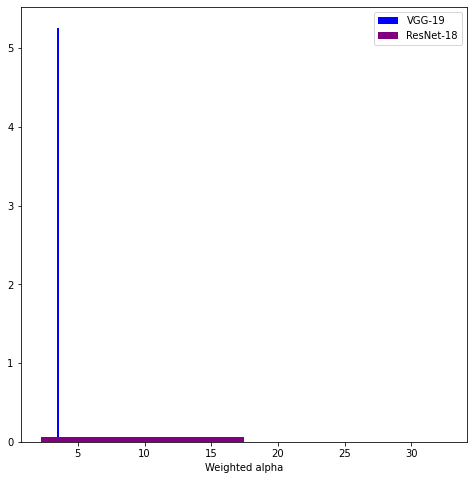

In [10]:
y = vggWatcherDetails.alpha.to_numpy()
plt.hist(y, bins=2, alpha=1, color='blue', label='VGG-19', density=True);
y = renetWatcherDetails.alpha.to_numpy()
plt.hist(y, bins=2, alpha=1, color='purple', label='ResNet-18', density=True);
#y = renetWatcherDetails.alpha.to_numpy()
#plt.hist(y, bins=2, alpha=1, color='teal', label='DenseNet-161', density=True);

plt.legend()
plt.xlabel("Weighted alpha")

Text(0.5, 0, 'Log-norm')

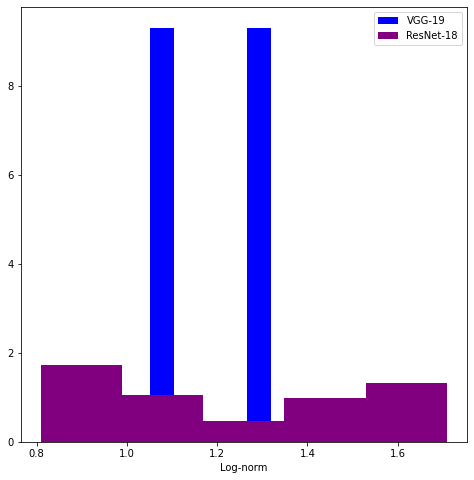

In [11]:
y = vggWatcherDetails.lognorm.to_numpy()
plt.hist(y, bins=5, alpha=1, color='blue', label='VGG-19', density=True);
y = renetWatcherDetails.lognorm.to_numpy()
plt.hist(y, bins=5, alpha=1, color='purple', label='ResNet-18', density=True);
#y = renetWatcherDetails.lognorm.to_numpy()
#plt.hist(y, bins=5, alpha=1, color='teal', label='DenseNet-161', density=True);

plt.legend()
plt.xlabel("Log-norm")